In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [6]:
resumeDataSet = pd.read_csv('C:\\Users\\user\\NLP\\UpdatedResumeDataSet.csv' ,encoding='utf-8')

In [8]:
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head

<bound method NDFrame.head of          Category                                             Resume  \
0    Data Science  Skills * Programming Languages: Python (pandas...   
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2    Data Science  Areas of Interest Deep Learning, Control Syste...   
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   
..            ...                                                ...   
957       Testing  Computer Skills: â¢ Proficient in MS office (...   
958       Testing  â Willingness to accept the challenges. â ...   
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...   
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...   

    cleaned_resume  
0                   
1                   
2                   
3                   


### Displaying unique categories in the resume

In [11]:
print (resumeDataSet['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


### Displaying the distinct categories of resume and the number of records belonging to each category

In [12]:
print (resumeDataSet['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Blockchain                   40
Mechanical Engineer          40
Sales                        40
ETL Developer                40
Operations Manager           40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


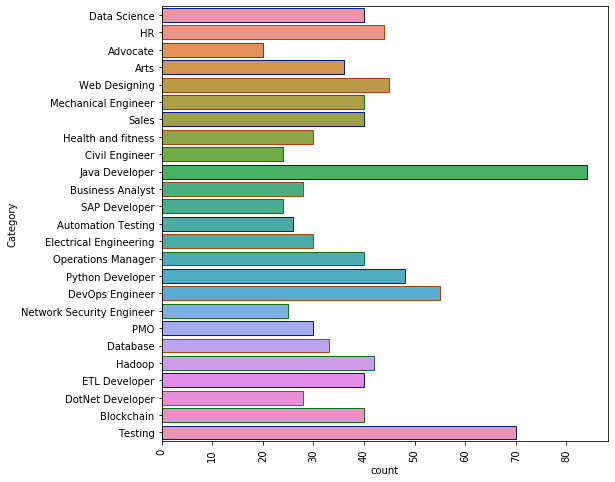

In [17]:
import seaborn as sns
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet, edgecolor=sns.color_palette("dark", 3))

In [19]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))


In [21]:
resumeDataSet

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [37]:
Paragraph = resumeDataSet['Resume'].values
#(resumeDataSet['Resume'].values)


In [39]:
len(Paragraph)

962

In [48]:
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
#Paragraph = resumeDataSet['Resume'].values
#sentences = nltk.sent_tokenize(paragraph)

corpus = []
for i in range(len(Paragraph)):
    review = re.sub('[^a-zA-Z]', ' ', Paragraph[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [51]:
wordfreqdist = nltk.FreqDist(review)
mostcommon = wordfreqdist.most_common(5)
print(mostcommon)

[(' ', 206), ('e', 106), ('a', 106), ('t', 104), ('n', 85)]


### Creating the Bag of Words model

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()

In [56]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Train test split

In [57]:
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

cv = CountVectorizer(max_features = 1500)
cv.fit(requiredText)
WordFeatures = cv.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)


Feature completed .....
(769, 1500)
(193, 1500)


In [59]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.97
Accuracy of KNeighbors Classifier on test set: 0.94

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
                           precision    recall  f1-score   support

                 Advocate       1.00      0.67      0.80         3
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       0.90      1.00      0.95         9
         Business Analyst       1.00      0.83      